### 简单线性回归

简单线性回归：使用单一特征来预测响应值。

因变量$y=b_0+b_1x_1$，通过$min\{SUM(y_i-y_p)^2\}$,其中$y_i$为实际值,$y_p$为预测值。

#### 数据预处理

- 导入相关库
- 导入数据集
- 划分数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('datasets/studentscores.csv')
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [10]:
X=dataset.iloc[:,:1].values
Y=dataset.iloc[:,1].values

train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train_data和test_data，形式为:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,train_target,test_size,random_state)
参数说明:

- test_size:测试样本占比
- random_state:随机种子；种子不同，产生不同的随机数。

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/4,random_state=0)

#### 训练简单线性回归模型

linear_model.LinearRegression()用法
函数原型：
class sklearn.linear_model.LinearRegression(fit_intercept,normalize,copy_X,n_jobs)
参数说明:

- fit_intercept:布尔型,默认为true；表示是否对训练数据进行中心化；
- normalize:布尔型，默认为false；表示是否对数据进行归一化处理；
- copy_X:布尔型，默认为true；表示是否将中心化、归一化后的数据覆盖原数据
- n_jobs:整型，默认为1;表示是否使用多个CPU计算

返回值说明:

- coef_:数组变量，形状为(n_features,)或(n_targets,n_featrues)
- intercept_:数组变量，表示线性模型中的独立项

方法:

- fit(X,y,[n_jobs]):对训练集X,y进行训练
- predict(X):使用训练得到的模型对输入X进行预测
- score(X,y):返回以X为样本,y为标签的预测结果评分，最后得分为1.0，得分一般比1.0低

In [12]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 预测结果

In [13]:
Y_pred=model.predict(X_test)

#### 可视化

##### 训练集结果可视化

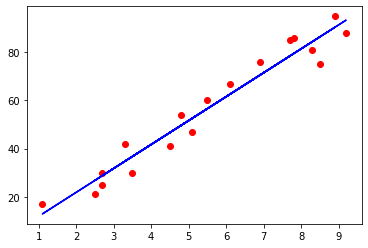

In [15]:
plt.scatter(X_train,Y_train,color='r')
plt.plot(X_train,model.predict(X_train),color='b')
plt.show()

##### 测试集结果可视化

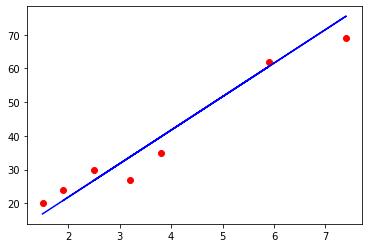

In [16]:
plt.scatter(X_test,Y_test,color='r')
plt.plot(X_test,model.predict(X_test),color='b')
plt.show()

### 多元线性回归

多元线性回归需要注意：

- 想要回归分析的结果是成功需要确定:
    - 自变量和因变量是线性的
- 过多的变量会降低模型的精确度，可以适当减少一些无关的变量。
- 非数值型数据需先转为数值型数据（也叫虚拟变量）。
- **虚拟变量陷阱**
    - 虚拟变量陷阱是指两个以上（包括两个）变量之间高度相关的情形。即存在一个能够被其他变量预测出来的变量。比如性别中，可以通过女性类别类推断男性性别。
    - **解决的办法是:**类别变量减去一，即假如有m个类别，那么在构建模型时取m-1个虚拟变量。

多元线性回归步骤总结:

- 数据预处理
    - 导入相关库
    - 导入数据
    - 处理缺少值
    - 将非数值型数据转为数值型数据
    - 特征缩放:归一化等
- 训练模型
    - 定义LinearRegression类的实例model
    - 调用modle.fit()方法进行训练
- 预测结果
    - 使用model.predict()方法来预测结果

#### 数据预处理

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('datasets/50_Startups.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,4].values

preprocessing.LabelEncoder是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码。其方法包括:

- fit(y):统计y中的不重复的键
- fit_transform(y):先执行fit(),之后将y中每个文本数据转为索引值
```python
>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"]) 
array([2, 2, 1])
```

preprocessing.OneHotEncoder将数据转为One-Hot编码，One-Hot编码是分类变量作为二进制向量的表示。

```python
#旧版OneHotEncoder用法
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder()
enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])

ans = enc.transform([[0, 1, 3]]).toarray()  # 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式，也可以通过参数指定 sparse = False 来达到同样的效果
print(ans) # 输出 [[ 1.  0.  0.  1.  0.  0.  0.  0.  1.]]
```
下面解释输出结果的意思。对于输入数组，这依旧是把每一行当作一个样本，每一列当作一个特征，

- 我们先来看第一个特征，即第一列 [0,1,0,1]，也就是说它有两个取值 0 或者 1，那么 one-hot 就会使用两位来表示这个特征，[1,0] 表示 0， [0,1] 表示 1，在上例输出结果中的前两位 [1,0...] 也就是表示该特征为 0
- 第二个特征，第二列 [0,1,2,0]，它有三种值，那么 one-hot 就会使用三位来表示这个特征，[1,0,0] 表示 0， [0,1,0] 表示 1，[0,0,1] 表示 2，在上例输出结果中的第三位到第六位 [...0,1,0,0...] 也就是表示该特征为 1
- 第三个特征，第三列 [3,0,1,2]，它有四种值，那么 one-hot 就会使用四位来表示这个特征，[1,0,0,0] 表示 0， [0,1,0,0] 表示 1，[0,0,1,0] 表示 2，[0,0,0,1] 表示 3，在上例输出结果中的最后四位 [...0,0,0,1] 也就是表示该特征为 3

```python
#新版用法
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ColumnTransform([(名称，转换器，列)],...)
#remainder='passthrough'表示未指定的列自动通过
#remainder='drop'表示未指定的列将被删除
ct=ColumnTransform([('Country',OneHotEncoder,[1])],remainder='passthrough')
X=ct.fit_transform(X)
```

In [3]:
#将非数值数据转为数值型数据
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelEncoder=LabelEncoder()
X[:,3]=labelEncoder.fit_transform(X[:,3])
ct=ColumnTransformer([('Country',OneHotEncoder(),[3])],remainder='passthrough')
X=ct.fit_transform(X)
print(X[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [4]:
#躲避虚拟变量陷阱
X=X[:,1:]

In [6]:
#拆分数据为训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#### 模型训练

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 预测

In [9]:
Y_pred=model.predict(X_test)
print(Y_test)
print(Y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]
